# **TSA Claims**
________________________

# 1. Analysis Background

Transportation Security Administration (TSA) didirikan atas respons atas hilangnya hampir 3,000 nyawa atas tindakan terorisme berencana yang terjadi di beberapa wilayah di Amerika Serikat dengan misi melindungi sistem transportasi negara untuk memastikan kebebasan bergeraknya masyarakat dan komersil. Namun dengan mengetatkan proses pemeriksaan dan melakukan pengawasan penuh pada sistem tranportasi, sering kali terjadi kesalahan yang dilakukan oleh pihak TSA seperti kerusakan dan kehilangan barang atau cidera yang dialamin oleh pengguna transportasi. Karena itu, pengguna transportasi dapat mengajukan klaim untuk investigasi dan kompensasi terkait barang yang hilang, rusak, maupun adanya cidera yang dialami pengguna transportasi.

# 2.   Problem Formulation

Dengan data yang diperoleh dari Kaggle dengan judul "TSA Claims Database - Property and injury claims filed from 2002-2015" dapat kita analisis untuk mencari langkah-langkah strategis guna mengoptimalkan operasional dari TSA. Atas data yang akan kita analisa, kita akan mencari jawaban dari:

**Apakah ada tren waktu tertentu dari insiden para pengguna transportasi dan bagaimana pola ganti rugi TSA atas klaim dari para pengguna transportasi?**

Mengapa mencari tahu tren waktu? untuk melihat apakah ada korelasi antara waktu-waktu tertentu dengan jumlah insiden. Apakah pada waktu tertentu dimana tren penumpang meningkat juga meningkatkan jumlah klaim? atau sebaliknya?

Mengapa mencari tahu bagaimana pola ganti rugi TSA atas klaim? tidak dijelaskan terkait peraturan mengenai ganti rugi pada laman TSA itu sendiri, dan variasi atas ganti rugi (sebagian pembayaran full, sebagian tidak, selebihnya cancel).

# 3. Data

Pada TSA Claims Dataset berisi data tahun 2002 hingga 2015 (data dapat di akses [di sini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)), terdapat 13 kolom terdiri dari:

1. **Claim Number**     : Nomor ID Klaim
2. **Date Received**    : Tanggal Klaim diterima
3. **Incident Date**    : Tanggal Insiden
4. **Airport Code**     : Kode Bandara sesuai standar IATA
5. **Airport Name**     : Nama bandara berdasarkan Airport Code
6. **Airline Name**     : Nama maskapai 
7. **Claim Type**       : Tipe klaim
8. **Claim Site**       : Lokasi terjadinya insiden
9. **Item**             : Item yang di klaim
10. **Claim Amount**    : Jumlah uang yang diajukan
11. **Status**          : Status klaim
12. **Close Amount**    : Jumlah uang yang disetujui
13. **Disposition**     : Disposisi atas klaim

Berikut adalah lima data teratas dan terbawah dari **TSA Claims Dataset**:

In [697]:
import pandas as pd
import pandas as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [698]:
df = pd.read_csv('tsa_claims.csv', low_memory= False)
display(df.head(), df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## 3.1 Data Understanding and Cleaning

Sebelum memasuki tahap analisa, kita harus mengenali terlebih dahulu dataset yang dimiliki. Tahapan ini untuk mengatahui apakah ada data-data yang tidak sesuai untuk di analisa dan akan ditindaklanjutkan pada tahap cleaning.

Pada awal tahap data understanding, kita akan mengecek data tipe dari masing-masing data:

In [699]:
print(f'Pada dataset ini, terdapat {df.shape[0]} baris dan {df.shape[1]} kolom. \n')
df.info()

Pada dataset ini, terdapat 204267 baris dan 13 kolom. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [700]:
df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204244,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013123010324,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [701]:
listItem = []
for cols in df.columns :
    listItem.append( [cols, df[cols].nunique(), df[cols].unique()])

Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
Desc

,Column Name,Number of Unique,Unique Sample
0,Claim Number,204244,"[0909802M, 0202417M, 0202445M, 0909816M, 20050..."
1,Date Received,4007,"[4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe..."
2,Incident Date,26807,"[12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0..."
3,Airport Code,465,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ..."
4,Airport Name,485,"[Newark International Airport, Seattle-Tacoma ..."
5,Airline Name,318,"[Continental Airlines, nan, American Airlines,..."
6,Claim Type,11,"[Property Damage, Passenger Property Loss, nan..."
7,Claim Site,6,"[Checkpoint, Checked Baggage, Other, Motor Veh..."
8,Item,4704,"[Other, Luggage (all types including footlocke..."
9,Claim Amount,36117,"[$350.00 , $100.00 , $278.88 , $50.00 , $84.79..."


### 3.1.1 Data Summary

Berdasarkan data diatas, kita dapat menarik beberapa data dimana:

* Terdapat 204267 baris dan 13 kolom
* Selain pada kolom `Claim Number`, kolom-kolom lainnya terdapat data yang kosong. Data-data yang kosong terisi oleh NaN.
* Kolom `Claim Number` merupakan data nomor klaim dari pengguna dan `Airline Name` merupakan data dari maskapai yang digunakan pengguna, tidak dapat di analisis dan akan dihapus.
* Pada kolom `Claim Amount` dan `Close Amount` seharusnya berupa data type Float, tetapi terbaca sebagai Object dikarenakan adanya simbol USD ($). Kita akan menindaklanjuti hal itu pada tahap selanjutnya.
* Pada kolom `Claim Amount` dan `Close Amount` pada bilangan ribuan menggunakan titik koma (;), akan diubah menjadi koma (,) pada tahap selanjutnya.
* Pada kolom `Incident Date`, terlihat data memiliki beberapa format tanggal seperti MM/DD/YYYY hh.mm dan DD-MM-YY, dan tidak selarasnya `Incident Date` sebagai tanggal kejadian dan `Date Received` sebagai tanggal pengajuan klaim. Sebagai contoh pada tabel dibawah: pada index 0, tanggal kejadian adalah 12 Desember 2002 dan tanggal pelaporan adalah 4 Januari 2002; index 1, tanggal kejadian adalah 16 Januari 2004 dan tanggal pelaporan adalah 2 Febuari 2002. Sulit untuk dilakukan cleaning dan maka dari itu kolom `Date Received` dan `Incident Date` akan diubah menjadi satu format dan diselaraskan.

# 4. Statistics

In [702]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204244,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013123010324,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


Terlihat data type dari seluruh kolom pada DataFrame **df** terhitung sebagai *object*, jadi tidak dapat melihat nilai statistika deskriptif dari data-data yang berupa numerikal. Kita akan menyesuaikan data type dari kolom numerikal pada tahap *Data Cleaning*.

Beberapa hal yang dapat kita simpulkan pada tahap **Statistics** adalah:
* Pada kolom `Claim Number`, terdapat dua klaim dengan nomor Claim Number yang sama, dimana seharusnya hal tersebut tidak terjadi. Hal ini tidak mempengaruhi analisis kita karena kolom `Claim Number` akan dihapus.
* Terdapat 465 data unik pada kolom `Airport Code`, dimana Bandara dengan kode LAX muncul paling banyak. Dapat kita tarik kesimpulan bahwa Klaim/Insiden terjadi paling banyak di Bandara dengan kode LAX selama tahun 2002-2015.
* Pada kolom `Airport Name`, terdapat 485 data unik, dimana Bandara John F. Kennedy International muncul paling banyak. Dapat kita tarik kesimpulan bahwa Klaim/Insiden terjadi paling banyak di Bandara John F. Kennedy International selama tahu 2002-2015.
* `Airline Name` berisi data maskapai yang dinaiki pengguna transportasi yang mengajukan klaim. Dapat kita tarik kesimpulan dimana penumpang *American Airlines* merupakan penumpang yang paling banyak mengajukan klaim.
* Kolom `Claim Site` menunjukkan 6 lokasi terjadinya insiden, dimana bagian pengecekan bagasi muncul paling banyak, sebanyak 159,753 kali.
* Pada kolom `Item`, *Other* muncul sebagai kategori terbanyak dari 4,704 kategori. Jumlah kategori yang sangat banyak berdasarkan data yang tidak terorganisir dengan baik menyulitkan untuk diikutsertakan didalam analisa. Karena itu kolom `Item` dipertimbangkan untuk dihapus.
* Kolom `Claim Amount` merupakan jumlah yang diajukan oleh penumpang, dan `Close Amount` adalah nominal ganti rugi yang dibayarkan oleh TSA. Terlihat data $0.00 muncul paling banyak di kedua kolom.
* Pada kolom `Status` dan `Disposition`, value Denied dan Deny muncul paling sering. 

# 5. Handling Missing Value

Pada tahap ini, kita akan mengecek data-data yang kosong terutama pada kolom-kolom yang memiliki data kosong diatas 10%.

In [703]:
display(df.isna().sum(), df.isna().sum()/df.shape[0]*100)

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

Claim Number      0.000000
Date Received     0.128753
Incident Date     1.068699
Airport Code      4.172970
Airport Name      4.172970
Airline Name     16.827975
Claim Type        3.873851
Claim Site        0.362271
Item              1.941576
Claim Amount      1.979272
Status            0.002448
Close Amount     33.755820
Disposition      35.692501
dtype: float64

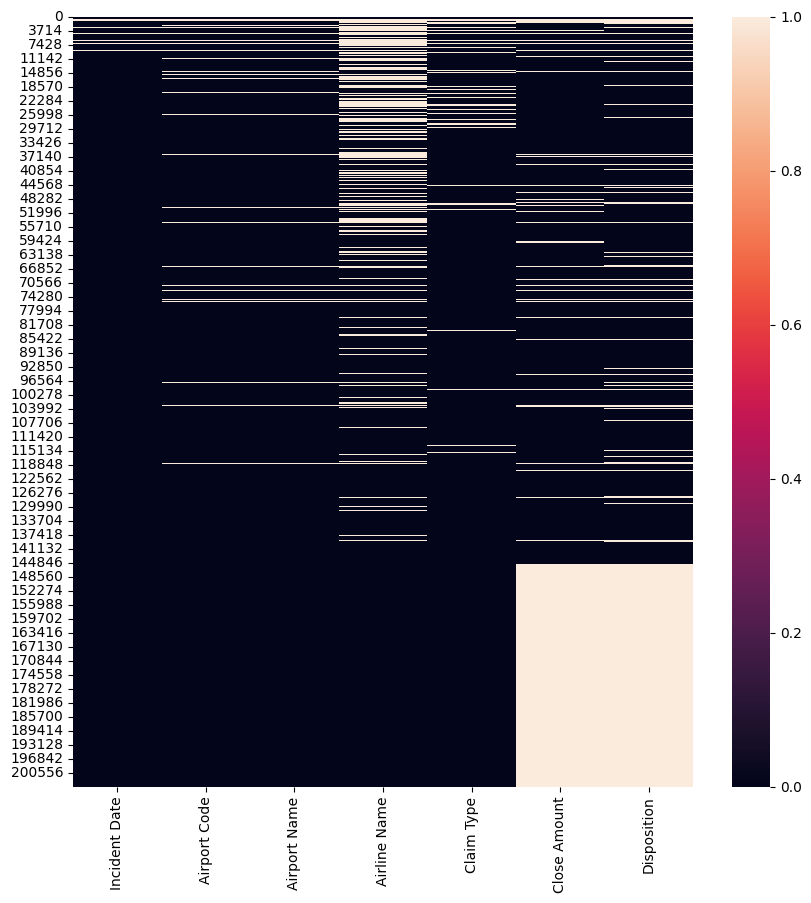

In [704]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Close Amount','Disposition']].isna())

plt.show()

In [705]:
# Setelah mengecek dataset secara manual, sebuah kejanggalan terlihat. Pada index 145144, terlihat ada data yang tidak sesuai dengan format yang semestinya. Terlihat data tersebut merupakan data yang ikut serta disaat penggabungan antara data diatas index 145144 dan dibawahnya. Kita akan drop data tersebut.

df[df.index>145140]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
145141,2010010667199,31-Dec-09,12/16/2009 10:00,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,$20.00,Denied,$0.00,Deny
145142,2010010767269,31-Dec-09,12/11/2009 0:00,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$156.88,Insufficient; one of the following items requi...,NaN,NaN
145143,2009122866807,31-Dec-09,11/21/2009 9:20,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Computer - Laptop,$1;228.95,Settled,$826.72,Settle
145144,==> 3.csv.new <==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145145,2010010567154,4-Jan-10,1/3/2010 14:30,SLC,Salt Lake City International Airport,Delta Air Lines,Property Damage,Checked Baggage,Cosmetics & Grooming,$0.00,Deny,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [706]:
df.drop(145144, inplace= True)
df[df.index > 145140]

# Data index 145144 telah kita hapus

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
145141,2010010667199,31-Dec-09,12/16/2009 10:00,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,$20.00,Denied,$0.00,Deny
145142,2010010767269,31-Dec-09,12/11/2009 0:00,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$156.88,Insufficient; one of the following items requi...,NaN,NaN
145143,2009122866807,31-Dec-09,11/21/2009 9:20,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Computer - Laptop,$1;228.95,Settled,$826.72,Settle
145145,2010010567154,4-Jan-10,1/3/2010 14:30,SLC,Salt Lake City International Airport,Delta Air Lines,Property Damage,Checked Baggage,Cosmetics & Grooming,$0.00,Deny,NaN,NaN
145146,2010010567158,4-Jan-10,1/2/2010 0:00,LAX,Los Angeles International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Deny,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


Dapat kita lihat bahwa data pada kolom `Airport Name`, `Airline Name`, `Close Amount` dan `Disposition` memiliki persentasi data kosong yang banyak (lebih dari 10%). Kolom `Airport Name` dan `Airline Name` merupakan data yang tidak perlu kita analisis, karena tidak berhubungan dengan *problem* yang ingin kita analusa, maka dari itu kolom yang akan dihapus adalah `Claim Number`, `Airport Name` dan `Airline Name`.

Pada kolom `Close Amount` dan `Disposition` baris ke 145,000 kebawah, terlihat data kosong. Setelah di telusuri, terlihat pada index 145144, terlihat seperti adanya file csv baru yang ditambahkan dan dari index 145144 kebawah data `Closing Amount` dan `Disposition` hanya berupa data NaN. Baris 145144 akan kita hapus sebelum melanjutkan ke tahap selanjutnya.

Pertama-tama kita akan membuat copy dari DataFrame awal menjadi **train_df** dan menghapus kolom `Claim Number`, `Airport Name`, dan `Airline Name` sebelum memulai proses cleaning data.

In [707]:
# Create copy of main dataframe
train_df = df.copy()

In [708]:
# Dropping `Claim Number`, `Airport Name`, and `Airline Name` columns
train_df.drop(columns=['Claim Number','Airport Name','Airline Name'], inplace=True)
train_df.head()

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,4-Jan-02,12/12/2002 0:00,EWR,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,2-Feb-02,1/16/2004 0:00,SEA,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,4-Feb-02,11/26/2003 0:00,STL,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,7-Feb-02,1/6/2003 0:00,MIA,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,18-Feb-02,2/5/2005 0:00,MCO,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## 5.1 Cleaning Data Kolom `Date Received` dan `Incident Date`

In [709]:
# Change the `Date Received` and `Incident Date` columns datatype to datetime data type
train_df['Date Received'] = pd.to_datetime(train_df['Date Received'], errors='coerce')
train_df['Incident Date'] = pd.to_datetime(train_df['Incident Date'], errors='coerce')

In [710]:
# Removing hours in `Incident Date` columns and change the data type again
train_df['Date Received'] = pd.to_datetime(train_df['Date Received']).dt.date
train_df['Incident Date'] = pd.to_datetime(train_df['Incident Date']).dt.date

train_df['Date Received'] = train_df['Date Received'].astype('datetime64')
train_df['Incident Date'] = train_df['Incident Date'].astype('datetime64')

train_df.head()

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,2002-01-04,2002-12-12,EWR,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,2002-02-02,2004-01-16,SEA,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,2002-02-04,2003-11-26,STL,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,2002-02-07,2003-01-06,MIA,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2002-02-18,2005-02-05,MCO,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [711]:
# Change the datetime format to DD-MM-YYYY
train_df['Date Received'] = train_df['Date Received'].dt.strftime('%d/%m/%Y')
train_df['Incident Date'] = train_df['Incident Date'].dt.strftime('%d/%m/%Y')
train_df.head(1)

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,04/01/2002,12/12/2002,EWR,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full


In [712]:
# Change the position of Incident Date value if the value comes after the Date Received
train_df[['Date Received', 'Incident Date']] = train_df[['Incident Date', 'Date Received']].where(train_df['Incident Date'] > train_df['Date Received'], train_df[['Date Received', 'Incident Date']].values)
display(train_df[['Date Received','Incident Date']].head(), train_df[['Date Received','Incident Date']].tail())

,Date Received,Incident Date
0,12/12/2002,04/01/2002
1,16/01/2004,02/02/2002
2,26/11/2003,04/02/2002
3,07/02/2002,06/01/2003
4,18/02/2002,05/02/2005


,Date Received,Incident Date
204262,20/11/2015,16/10/2015
204263,17/12/2015,02/12/2015
204264,22/12/2015,20/12/2015
204265,30/12/2015,28/12/2015
204266,31/12/2015,23/11/2015


In [713]:
# After the data format and data type correct, we check for missing values
print(f'''
Jumlah data yang kosong pada kolom Date Received: {train_df['Date Received'].isna().sum()}
Jumlah Data yang kosong pada kolom Incident Date: {train_df['Incident Date'].isna().sum()}''')


Jumlah data yang kosong pada kolom Date Received: 262
Jumlah Data yang kosong pada kolom Incident Date: 2346


In [714]:
# Removing missing values in `Date Received` and `Incident Date` columns
train_df.dropna(subset=['Date Received'], inplace=True)
train_df.dropna(subset=['Incident Date'], inplace=True)

print(f'''
Jumlah data yang kosong pada kolom Date Received: {train_df['Date Received'].isna().sum()}
Jumlah Data yang kosong pada kolom Incident Date: {train_df['Incident Date'].isna().sum()}''')


Jumlah data yang kosong pada kolom Date Received: 0
Jumlah Data yang kosong pada kolom Incident Date: 0


In [715]:
# Since the data type still as object, change it once more to datetime data type

train_df['Date Received'] = train_df['Date Received'].astype('datetime64')
train_df['Incident Date'] = train_df['Incident Date'].astype('datetime64')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201781 entries, 0 to 204266
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date Received  201781 non-null  datetime64[ns]
 1   Incident Date  201781 non-null  datetime64[ns]
 2   Airport Code   194756 non-null  object        
 3   Claim Type     195381 non-null  object        
 4   Claim Site     201249 non-null  object        
 5   Item           198030 non-null  object        
 6   Claim Amount   199234 non-null  object        
 7   Status         201781 non-null  object        
 8   Close Amount   134057 non-null  object        
 9   Disposition    130337 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 16.9+ MB


In [716]:
# In `Incident Date` column, there are anomalies where there are years that not fit with the other values, such as 1994, 2000, 2001, 2025, 2040, 2055. We'll remove those.
incident_year = train_df['Incident Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year'})
incident_year['Year'] = incident_year['Year'].astype(int)
incident_year

,Year,Incident Date
0,1994,1
1,2000,9
2,2001,9
3,2002,1411
4,2003,22093
5,2004,29348
6,2005,23990
7,2006,18882
8,2007,18469
9,2008,16170


In [717]:
# Removing data other than years within 2002 until 2015
train_df = train_df[(train_df['Incident Date'].dt.year >= 2002) & (train_df['Incident Date'].dt.year <= 2015)]
train_df['Incident Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year'})

,Year,Incident Date
0,2002,1411
1,2003,22093
2,2004,29348
3,2005,23990
4,2006,18882
5,2007,18469
6,2008,16170
7,2009,12269
8,2010,11379
9,2011,10931


In [718]:
# In `Date Received` column, there are anomalies where there are years that not fit with the other values, such as 1996, 2000, 2001, 2020, 2025, 2044. We'll remove those.
claim_year = train_df['Date Received'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year'})
claim_year['Year'] = claim_year['Year'].astype(int)
claim_year

,Year,Date Received
0,1996,2
1,2000,9
2,2001,6
3,2002,1644
4,2003,23482
5,2004,29127
6,2005,23320
7,2006,18906
8,2007,18350
9,2008,16111


In [719]:
# Removing data other than years within 2002 until 2015
train_df = train_df[(train_df['Date Received'].dt.year >= 2002) & (train_df['Date Received'].dt.year <= 2015)]
train_df['Date Received'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year'})

,Year,Date Received
0,2002,1644
1,2003,23482
2,2004,29127
3,2005,23320
4,2006,18906
5,2007,18350
6,2008,16111
7,2009,11673
8,2010,11761
9,2011,10968


## 5.2 Cleaning data Kolom `Claim Type`, `Claim Site`

In [720]:
display(train_df['Claim Type'].value_counts(), train_df['Claim Site'].value_counts())

Passenger Property Loss    117314
Property Damage             74909
Personal Injury              1462
Employee Loss (MPCECA)        485
Passenger Theft               463
Motor Vehicle                 369
-                             282
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

Checked Baggage    158858
Checkpoint          39901
Other                1679
Motor Vehicle         474
-                     276
Bus Station            16
Name: Claim Site, dtype: int64

In [721]:
# Looking the total of missing values in `Claim Type` and `Claim Site` columns
print(f'''
Jumlah data yang kosong pada kolom Claim Type: {train_df['Claim Type'].isna().sum()}
Jumlah Data yang kosong pada kolom Claim Site: {train_df['Claim Site'].isna().sum()}''')


Jumlah data yang kosong pada kolom Claim Type: 6396
Jumlah Data yang kosong pada kolom Claim Site: 532


In [722]:
# Filling the missing values and filled with ' - ' in `Claim Type` and `Claim Site` with 'Other'
train_df['Claim Type'] = train_df['Claim Type'].fillna('Other')
train_df['Claim Type'] = train_df['Claim Type'].replace('-', 'Other')
train_df['Claim Site'] = train_df['Claim Site'].fillna('Other')
train_df['Claim Site'] = train_df['Claim Site'].replace('-', 'Other')

In [723]:
# Looking the total of missing values in `Claim Type` and `Claim Site` columns
print(f'''
Jumlah data yang kosong pada kolom Claim Type: {train_df['Claim Type'].isna().sum()}
Jumlah Data yang kosong pada kolom Claim Site: {train_df['Claim Site'].isna().sum()}''')


Jumlah data yang kosong pada kolom Claim Type: 0
Jumlah Data yang kosong pada kolom Claim Site: 0


In [724]:
# Removing 'Bus Terminal' values from `Claim Type` column
train_df.drop(train_df[train_df['Claim Type']=='Bus Terminal'].index, inplace=True)

# Removing 'Compliment' values from `Claim Type` column
train_df.drop(train_df[train_df['Claim Type']=='Compliment'].index, inplace=True)

In [725]:
display(train_df['Claim Type'].value_counts(), train_df['Claim Site'].value_counts())

Passenger Property Loss    117314
Property Damage             74909
Other                        6678
Personal Injury              1462
Employee Loss (MPCECA)        485
Passenger Theft               463
Motor Vehicle                 369
Complaint                      48
Wrongful Death                  4
Name: Claim Type, dtype: int64

Checked Baggage    158856
Checkpoint          39899
Other                2487
Motor Vehicle         474
Bus Station            16
Name: Claim Site, dtype: int64

Pada langkah cleaning diatas, data yang berisi data kosong (NaN) dan dash ' - ' telah diganti menjadi Other, dengan asumsi bahwa data memang segaja tidak diisi atau tidak tercantum pada formulir klaim. Hal ini untuk mengurangi jumlah kategori agar memudahkan analisis.

Berdasarkan data diatas, pada kolom `Claim Type`, klaim didominasi oleh pengguna transportasi yang mengalami kehilangan barang oleh diikuti oleh klaim atas kerusakan dari barang pengguna transportasi.

Sedangkan pada kolom `Claim Site`, diketahui bahwa insiden yang dilakukan pihak TSA seringkali terjadi disaat pengecekan bagasi dan diikuti oleh checkpoint.

Pada kolom `Claim Type` terdapat satu data yang berjumlah satu yaitu Bus Terminal, dimana tidak selaras dengan tipe-tipe lainnya. Maka dari itu diputuskan untuk dihapus saja. Sedangkan untuk Tipe Klaim *Compliment*, apabila kita telusuri lebih lanjut pada dasarnya tidak ada data yang dapat digunakan untuk analisis. *Compliment* sendiri secara pengertian berarti 'Expression of praise, admiration, and a formal act of respect' (sumber [di sini](https://www.dictionary.com/browse/compliment)) yang dapat diartikan bukan berupa klaim ganti rugi atas kerugian, yang dimana dapat dihapus karena tidak sesuai dengan tujuan analisis.

## 5.3 Cleaning data kolom `Airport Code` dan `Airport Name`

Melihat jumlah data kosong yang tidak terlalu banyak pada kolom `Airport Code` dan `Airport Name`, diputuskan untuk drop data yang kosong.

In [726]:
# Looking the total of missing values in `Airport Code` column
print(f'Jumlah data kosong pada kolom Airport Code adalah: {train_df["Airport Code"].isna().value_counts()[1]}')

Jumlah data kosong pada kolom Airport Code adalah: 7022


In [727]:
# Removing missing values in `Airport Code` column
train_df.dropna(subset=['Airport Code'], inplace=True)
display(train_df['Airport Code'].isna().value_counts())

False    194710
Name: Airport Code, dtype: int64

## 5.4 Cleaning data Kolom `Item`


In [728]:
# Looking the total of missing values in `Item` column
print(f'Terdapat {train_df["Item"].isna().value_counts()[1]} data kosong dan {train_df["Item"].nunique()} data unik pada kolom Item')

Terdapat 3543 data kosong dan 4678 data unik pada kolom Item


In [729]:
# Looking unique values in `Item` column
train_df['Item'].value_counts()

Other                                                                                                                                 34210
Luggage (all types including footlockers)                                                                                             17281
Clothing - Shoes; belts; accessories; etc.                                                                                            13764
Jewelry - Fine                                                                                                                         9321
Locks                                                                                                                                  9006
                                                                                                                                      ...  
Clothing - Shoes; belts; accessories; etc.; Cosmetics - Perfume; toilet articles; medicines; soaps; etc.; DVD/CD Players; Other           1
Cosmetics - Perfume;

In [730]:
# Removing missing values in `Item` column
train_df.dropna(subset='Item', inplace=True)

In [731]:
train_df[train_df['Item']=="Audio - CD's; Boxes - Jewelry; Cigarette; Music; etc.; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.); Clothing - Shoes; belts; accessories; etc.; Cosmetics - Perfume; toilet articles; medicines; soaps; etc.; GPS - Global Positioning System; Luggage (all types including footlockers); MP3 Players-(iPods; etc); Medicines; Other"]

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
115845,2007-12-31,2007-11-23,JFK,Passenger Property Loss,Checked Baggage,Audio - CD's; Boxes - Jewelry; Cigarette; Musi...,$1;680.00,Denied,$0.00,Deny


Melihat dari value pada kolom dan data unique, ditemukan bahwa terdapat beberapa klaim berisi lebih dari satu kategori item. Contohnya seperti klaim pada index 115845 dimana berisi value item:

"Audio - CD's; Boxes - Jewelry; Cigarette; Music; etc.; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.); Clothing - Shoes; belts; accessories; etc.; Cosmetics - Perfume; toilet articles; medicines; soaps; etc.; GPS - Global Positioning System; Luggage (all types including footlockers); MP3 Players-(iPods; etc); Medicines; Other"

Sulit untuk memisahkan masing-masing item dan menganalisa nya berdasarkan per item. Maka dari itu diputuskan untuk **drop** kolom `Item` dan dapat menjadi bahan menarik untuk di analisa oleh kesempatan selanjutnya.

In [732]:
# Drop kolom Item
train_df.drop(columns=['Item'], inplace=True)
train_df.head()

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition
0,2002-12-12,2002-04-01,EWR,Property Damage,Checkpoint,$350.00,Approved,$350.00,Approve in Full
1,2004-01-16,2002-02-02,SEA,Property Damage,Checked Baggage,$100.00,Settled,$50.00,Settle
2,2003-11-26,2002-04-02,STL,Property Damage,Checked Baggage,$278.88,Settled,$227.92,Settle
3,2002-07-02,2003-06-01,MIA,Property Damage,Checkpoint,$50.00,Approved,$50.00,Approve in Full
4,2002-02-18,2005-05-02,MCO,Property Damage,Checkpoint,$84.79,Approved,$84.79,Approve in Full


## 5.5 Cleaning Kolom `Status` dan `Disposition`

Apabila kita lihat value pada kolom `Status`, terdapat 14 data unik dimana beberapa value memiliki makna yang sama dengan value yang lain:
* **Denied** = Klaim Ditolak
* **Approved** = Klaim Diterima dengan ganti rugi penuh
* **Settled** = Klaim Selesai dengan ganti rugi tidak penuh
* **Canceled** = Klaim Dibatalkan
* **Deny** = Klaim Ditolak (Sama seperti *Denied*)
* **Approve in Full** = Klaim diterima dengan ganti rugi penuh (Sama seperti *Approved*)
* **Settle** = Klaim Selesai dengan ganti rugi tidak penuh (Sama Seperti *Settled*)
* **Insufficient** = Klaim Dibatalkan dikarenakan data yang tidak lengkap (Sama seperti *Canceled*)

Untuk value lainnya, akan kita drop. Alasan untuk di drop adalah agar meminimalisir kesalahan analisis karena terlalu banyak kategori.

In [733]:
# Looking unique values in `Status` and `Disposition` columns
print(f'Terdapat {train_df["Status"].nunique()} data unik pada kolom Status dan {train_df["Disposition"].nunique()} data unik pada kolom Disposition')

Terdapat 13 data unik pada kolom Status dan 3 data unik pada kolom Disposition


In [734]:
display(train_df['Status'].value_counts(), train_df['Disposition'].value_counts())

Denied                                                                                                                           64848
Approved                                                                                                                         32807
Deny                                                                                                                             28237
Settled                                                                                                                          25981
-                                                                                                                                12749
Approve in Full                                                                                                                  12364
Settle                                                                                                                            5765
Canceled                                               

Deny               64870
Approve in Full    32815
Settle             25988
Name: Disposition, dtype: int64

In [735]:
# Replace values that has same meanings into four categories
train_df['Status'] = train_df['Status'].replace('Deny', 'Denied', regex=False)
train_df['Status'] = train_df['Status'].replace('Approve in Full', 'Approved', regex=False)
train_df['Status'] = train_df['Status'].replace('Settle', 'Settled', regex=False)
train_df['Status'] = train_df['Status'].replace('Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.', 'Canceled', regex=False)

In [736]:
# Dropping categories in `Status` columns that are not included in analysis
train_df.drop(train_df[train_df['Status']=='-'].index, inplace=True)
train_df.drop(train_df[train_df['Status']=='Closed as a contractor claim'].index, inplace=True)
train_df.drop(train_df[train_df['Status']=='In litigation'].index, inplace=True)
train_df.drop(train_df[train_df['Status']=='In review'].index, inplace=True)
train_df.drop(train_df[train_df['Status']=='Claim has been assigned for further investigation'].index, inplace=True)
train_df.drop(train_df[train_df['Status']=='Pending response from claimant'].index, inplace=True)

In [737]:
# Looking the total of missing values in `Disposition` column
print(f'Jumlah data NaN pada kolom Disposition adalah: {train_df["Disposition"].isna().value_counts()[1]}')

Jumlah data NaN pada kolom Disposition adalah: 53743


Setelah kita melakukan proses cleaning pada kolom `Status`, kita akan melanjutkan dengan cleaning pada kolom `Disposition`. Diatas, kita dapat melihat bahwa terdapat 57,348 baris data NaN pada kolom `Disposition`. Dikarenakan data pada kolom `Disposition` berisi sama dengan data pada kolom `Status`, maka dari itu data kosong pada kolom `Disposition` akan diisi value yang sama dengan value pada kolom `Status`, dimana kategori pada kolom `Disposition` bertambah satu yaitu **Canceled** untuk klaim yang dibatalkan.

In [738]:
# Filling missing values in `Disposition` column with value based on `Item` column
train_df.loc[train_df['Disposition'].isna() & train_df['Status'].isin(['Approved']),'Disposition']='Approve in Full'
train_df.loc[train_df['Disposition'].isna() & train_df['Status'].isin(['Denied']),'Disposition']='Deny'
train_df.loc[train_df['Disposition'].isna() & train_df['Status'].isin(['Settled']),'Disposition']='Settle'
train_df.loc[train_df['Disposition'].isna() & train_df['Status'].isin(['Canceled']),'Disposition']='Cancel'

In [739]:
display(train_df['Status'].value_counts(), train_df['Disposition'].value_counts())

Denied      93085
Approved    45171
Settled     31746
Canceled     7357
Name: Status, dtype: int64

Deny               93097
Approve in Full    45176
Settle             31749
Cancel              7337
Name: Disposition, dtype: int64

## 5.6 Cleaning data Kolom `Claim Amount` dan `Close Amount`

Apabila kita lihat, data tipe dari kolom Claim Amount dan Close Amount masih berupa object/string, untuk memudahkan penghitungan akan di ubah menjadi float.

In [740]:
# Checking `Claim Amount` and `Close Amount` data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177359 entries, 0 to 204206
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date Received  177359 non-null  datetime64[ns]
 1   Incident Date  177359 non-null  datetime64[ns]
 2   Airport Code   177359 non-null  object        
 3   Claim Type     177359 non-null  object        
 4   Claim Site     177359 non-null  object        
 5   Claim Amount   175570 non-null  object        
 6   Status         177359 non-null  object        
 7   Close Amount   125830 non-null  object        
 8   Disposition    177359 non-null  object        
dtypes: datetime64[ns](2), object(7)
memory usage: 13.5+ MB


In [741]:
# `Claim Amount` and `Close Amount` columns are detected as object as there is symbols in the value
train_df[['Claim Amount','Close Amount']].head()

,Claim Amount,Close Amount
0,$350.00,$350.00
1,$100.00,$50.00
2,$278.88,$227.92
3,$50.00,$50.00
4,$84.79,$84.79


In [742]:
# Menghapus simbol USD ($) dan mengganti semicolon (;) menjadi comma (,), dan mengganti dash ' - ' menjadi 0.00 pada kolom Claim Amount
train_df['Claim Amount'] = train_df['Claim Amount'].fillna('0.00')
train_df['Claim Amount'] = train_df['Claim Amount'].replace('-', '0.00')
train_df['Claim Amount'] = train_df['Claim Amount'].str.replace(';', '', regex=False)
train_df['Claim Amount'] = train_df['Claim Amount'].str.replace('$', '', regex=False)

# Menghapus simbol USD ($) dan mengganti semicolon (;) menjadi comma (,), dan mengganti dash ' - ' menjadi 0.00 pada kolom Close Amount
train_df['Close Amount'] = train_df['Close Amount'].fillna('0.00')
train_df['Close Amount'] = train_df['Close Amount'].replace('-', '0.00')
train_df['Close Amount'] = train_df['Close Amount'].str.replace(';', '', regex=False)
train_df['Close Amount'] = train_df['Close Amount'].str.replace('$', '', regex=False)

In [743]:
# Changing the `Claim Amount` and `Close Amount` data type into float
train_df['Claim Amount'] = train_df['Claim Amount'].astype(float)
train_df['Close Amount'] = train_df['Close Amount'].astype(float)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177359 entries, 0 to 204206
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date Received  177359 non-null  datetime64[ns]
 1   Incident Date  177359 non-null  datetime64[ns]
 2   Airport Code   177359 non-null  object        
 3   Claim Type     177359 non-null  object        
 4   Claim Site     177359 non-null  object        
 5   Claim Amount   177359 non-null  float64       
 6   Status         177359 non-null  object        
 7   Close Amount   177359 non-null  float64       
 8   Disposition    177359 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 13.5+ MB


In [744]:
# When the `Status` is 'Approved', the `Close Amount and `Disposition` will follow the value of `Claim Amount` and `Status` columns. We cannot determine the value of `Close Amount` if the `Status` is 'Settled'. We would only fill values of `Close Amount` if the `Status` value is `Approved`.

train_df['Close Amount'] = train_df['Claim Amount'].where(train_df['Status'] == "Approved", train_df['Close Amount'])

In [745]:
train_df[train_df['Status']=='Approved']

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition
0,2002-12-12,2002-04-01,EWR,Property Damage,Checkpoint,350.00,Approved,350.00,Approve in Full
3,2002-07-02,2003-06-01,MIA,Property Damage,Checkpoint,50.00,Approved,50.00,Approve in Full
4,2002-02-18,2005-05-02,MCO,Property Damage,Checkpoint,84.79,Approved,84.79,Approve in Full
6,2002-04-30,2007-04-26,PHL,Passenger Property Loss,Checked Baggage,106.52,Approved,106.52,Approve in Full
7,2002-06-20,2002-09-05,BWI,Other,Checkpoint,75.00,Approved,75.00,Approve in Full
...,...,...,...,...,...,...,...,...,...
204187,2015-02-06,2015-01-05,ZZX,Property Damage,Motor Vehicle,777.12,Approved,777.12,Approve in Full
204189,2015-06-29,2015-08-05,ZZX,Employee Loss (MPCECA),Motor Vehicle,250.00,Approved,250.00,Approve in Full
204202,2015-08-31,2015-10-09,ZZX,Motor Vehicle,Other,656.56,Approved,656.56,Approve in Full
204203,2015-09-29,2015-09-22,ZZX,Motor Vehicle,Motor Vehicle,1520.85,Approved,1520.85,Approve in Full


## 5.7 Summary of Data Cleaning

In [746]:
df_info_tiap_kolom = []

for a in train_df.columns:
    df_info_tiap_kolom.append([a,
                               train_df[a].dtypes,                                     
                               train_df[a].isna().sum(),                               
                               round((((train_df[a].isna().sum())/(len(train_df)))*100),2),  
                               train_df[a].nunique(),                                  
                               train_df[a].unique()])                                  

pd.DataFrame(data = df_info_tiap_kolom, columns=['nama_kolom', 'data_type', 'null', '%_of_null', 'unique','unique_sample'])

,nama_kolom,data_type,null,%_of_null,unique,unique_sample
0,Date Received,datetime64[ns],0,0.0,4714,"[2002-12-12T00:00:00.000000000, 2004-01-16T00:..."
1,Incident Date,datetime64[ns],0,0.0,4766,"[2002-04-01T00:00:00.000000000, 2002-02-02T00:..."
2,Airport Code,object,0,0.0,453,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ..."
3,Claim Type,object,0,0.0,9,"[Property Damage, Passenger Property Loss, Oth..."
4,Claim Site,object,0,0.0,5,"[Checkpoint, Checked Baggage, Other, Motor Veh..."
5,Claim Amount,float64,0,0.0,34625,"[350.0, 100.0, 278.88, 50.0, 84.79, 459.01, 10..."
6,Status,object,0,0.0,4,"[Approved, Settled, Canceled, Denied]"
7,Close Amount,float64,0,0.0,18833,"[350.0, 50.0, 227.92, 84.79, 227.0, 106.52, 75..."
8,Disposition,object,0,0.0,4,"[Approve in Full, Settle, Cancel, Deny]"


In [747]:
# menjadikan DataFrame copy train_df menjadi df
df = train_df

# 6. Data Analysis
Menjawab beberapa pertanyaan yang ada di problem formulation:

1. Apakah ada tren waktu tertentu dari insiden para pengguna transportasi?
2. Bagaimana pola ganti rugi TSA atas klaim dari para pengguna transportasi?

## 6.1 Apakah ada tren waktu tertentu dari insiden para pengguna transportasi?
* Apakah pada bulan/tahun tertentu insiden terjadi lebih banyak?
* Apakah pada waktu tertentu pengeluaran klaim lebih banyak?

In [748]:
incident_year = df['Incident Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year', 'Incident Date':'# of Incidents'})
incident_year

,Year,# of Incidents
0,2002,1222
1,2003,18109
2,2004,26982
3,2005,22876
4,2006,17620
5,2007,17811
6,2008,15601
7,2009,10765
8,2010,10136
9,2011,9790


In [749]:
claim_year = df['Date Received'].dt.year.value_counts().sort_index().reset_index().rename(columns={'index':'Year', 'Date Received':'# of Claims' })
claim_year

,Year,# of Claims
0,2002,1438
1,2003,19247
2,2004,26949
3,2005,22265
4,2006,17650
5,2007,17714
6,2008,15513
7,2009,10213
8,2010,10475
9,2011,9851


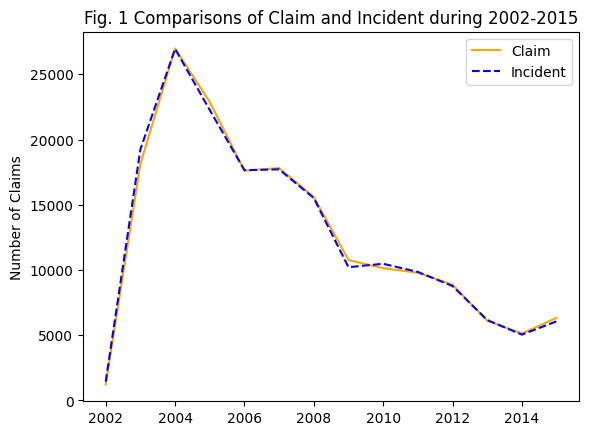

In [750]:
plt.plot(incident_year['Year'], incident_year['# of Incidents'], color='orange')
plt.plot(claim_year['Year'], claim_year['# of Claims'], linestyle='--', color='blue')
plt.ylabel('Number of Claims')
plt.title('Fig. 1 Comparisons of Claim and Incident during 2002-2015')
plt.legend(['Claim','Incident'])
plt.show()

### 6.1.1 Figure 1 Analysis

Dari plot diatas, kita dapat melihat adanya lonjakan kenaikan jumlah klaim yang terjadi dari tahun 2002 ke 2003. Dapat kita ketahui, TSA didirikan pada tahun 2002. Bisa kita asumsikan bahwa pengguna transportasi belum memahami terkait klaim ganti rugi terhadap TSA pada tahun 2002, dan mulai mengetahuinya pada tahun 2003. Bisa diasumsikan juga bahwa adanya penurunan penggunaan transportasi pada tahun 2002 disebabkan aksi terorisme yang terjadi pada akhir tahun 2001, menyebabkan sedikitnya jumlah insiden pada tahun 2002.

Terlihat pada tahun 2004, merupakan puncaknya yang mencapai hampir 27,000 insiden dan klaim ganti rugi. Tetapi seiring waktu, terlihat penurunan yang signifikan tiap tahunnya. Tetapi terdapat kenaikan jumlah klaim pada tahun 2009, lalu kenaikan jumlah insiden dan klaim yang terjadi setelah tahun 2014.

In [751]:
incident_month = df['Incident Date'].dt.month.value_counts().sort_index().reset_index().rename(columns={'index':'Months', 'Incident Date':'# of Incidents'})

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

incident_month['Months'] = incident_month['Months'].map(month_map)

incident_month

,Months,# of Incidents
0,Jan,16839
1,Feb,15426
2,Mar,16319
3,Apr,15438
4,May,16677
5,Jun,15226
6,Jul,15828
7,Aug,14666
8,Sep,13819
9,Oct,13455


In [752]:
claim_month = df['Date Received'].dt.month.value_counts().sort_index().reset_index().rename(columns={'index':'Months', 'Date Received':'# of Claims'})

claim_month['Months'] = claim_month['Months'].map(month_map)

claim_month

,Months,# of Claims
0,Jan,12982
1,Feb,11006
2,Mar,14530
3,Apr,13435
4,May,15270
5,Jun,14788
6,Jul,16458
7,Aug,16123
8,Sep,14806
9,Oct,15798


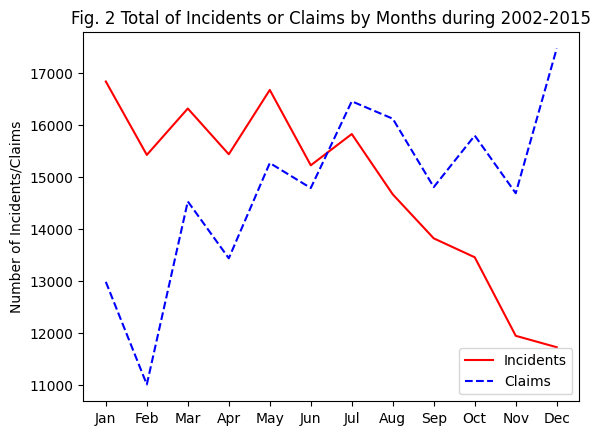

In [753]:
plt.plot(incident_month['Months'], incident_month['# of Incidents'], color='red', label='Incidents')
plt.plot(claim_month['Months'], claim_month['# of Claims'], linestyle='--',color='blue', label='Claims')

plt.title('Fig. 2 Total of Incidents or Claims by Months during 2002-2015')
plt.ylabel('Number of Incidents/Claims')

plt.legend()
plt.show()

In [754]:
df['Incident Date'].dt.month.value_counts()

1     16839
5     16677
3     16319
7     15828
4     15438
2     15426
6     15226
8     14666
9     13819
10    13455
11    11943
12    11723
Name: Incident Date, dtype: int64

### 6.1.2 Figure 2 Analysis

Dari line plot diatas, dapat dilihat bahwa **jumlah klaim** cenderung mengalami peningkatan setiap bulannya. Peningkatan paling signifikan terlihat pada bulan Februari ke Maret dan Bulan November ke Desember. Hal ini bertolak belakang dengan **jumlah insiden** yang dimana tiap bulannya menurun, dimana Bulan Desember merupakan titik terendah.

In [755]:
claim_by_year = df['Claim Amount'].groupby(df['Incident Date'].dt.year).sum().to_frame()
claim_by_year.reset_index(inplace=True)

In [756]:
close_by_year = df['Close Amount'].groupby(df['Incident Date'].dt.year).sum().to_frame()
close_by_year.reset_index(inplace=True)

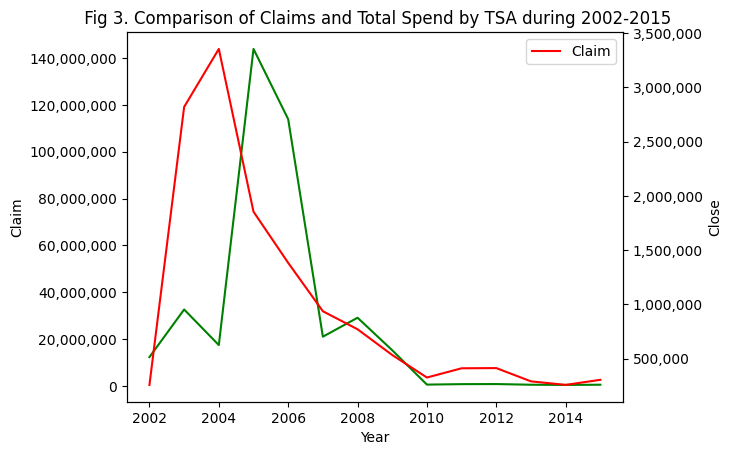

In [757]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(claim_by_year['Incident Date'], claim_by_year['Claim Amount'], 'g-', label='Claims')
ax1.set_xlabel('Year')
ax1.set_ylabel('Claim')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax2.plot(close_by_year['Incident Date'], close_by_year['Close Amount'], 'r-', label='Close')
ax2.set_ylabel('Close')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title(' Fig 3. Comparison of Claims and Total Spend by TSA during 2002-2015')
plt.legend(['Claim', 'Close'])
plt.show()

### 6.1.3 Figure 3 Analysis

Pada jumlah Claim, terlihat adanya peningkatan tajam pada tahun 2003 dan 2004, namun tahun-tahun selanjutnya menurun. Pada jumlah yang dibayarkan TSA, terlihat pengeluaran yang meningkat secara signifikan pada tahun 2005, lalu menurun pada tahun-tahun selanjutnya. Meskipun begitu, dapat terlihat nominal berbeda jauh, dimana pada tahun 2005 jumlah Claim mencapai hampir 80 juta USD, sedangkan jumlah yang dibayarkan TSA adalah mendekati 3.5 juta USD.

In [758]:
# Creating new columns that showing differences between Incident Date and Date Received
df['Days'] = (df['Incident Date'] - df['Date Received']).dt.days.fillna(0)
df[['Date Received', 'Incident Date', 'Days']]

,Date Received,Incident Date,Days
0,2002-12-12,2002-04-01,-255
1,2004-01-16,2002-02-02,-713
2,2003-11-26,2002-04-02,-603
3,2002-07-02,2003-06-01,334
4,2002-02-18,2005-05-02,1169
...,...,...,...
204189,2015-06-29,2015-08-05,37
204202,2015-08-31,2015-10-09,39
204203,2015-09-29,2015-09-22,-7
204204,2015-07-16,2015-10-13,89


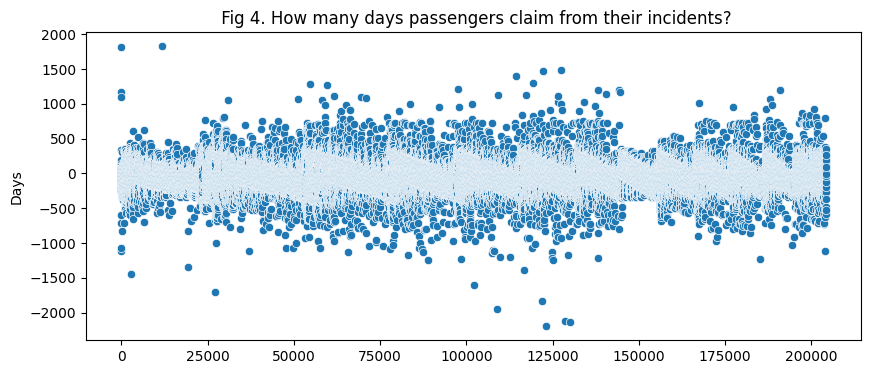

In [759]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['Days'])

plt.title(' Fig 4. How many days passengers claim from their incidents?')
plt.show()

### 6.1.4 Figure 4 Analysis

Berdasarkan scatter plot diatas, terlihat bahwa jumlah hari pengguna transportasi mengajukan klaim atas insiden mereka di dominasi pada rentang 0-500 hari. Adanya nilai minus dikarenakan format tanggal yang tidak berubah, sehinggi selisih hari antara pada kolom `Date Received` dan `Incident Date` menjadi terbalik dan nilai yang keluar minus.

# 6.2 Bagaimana pola ganti rugi TSA atas klaim dari para pengguna transportasi?
* Apakah lebih banyak yang mendapatkan ganti rugi full (approve in full) atau sebagian (settled)?
* apakah ada cerita dibaliknya?

In [760]:
df['Status'].value_counts()

Denied      93085
Approved    45171
Settled     31746
Canceled     7357
Name: Status, dtype: int64

In [761]:
total_denied_cancel = df['Status'].value_counts()[0] + df['Status'].value_counts()[3]
total_appr_settled = df['Status'].value_counts()[1] + df['Status'].value_counts()[2]

print(f'''
Total dari klaim yang ditolak dan gagal sebanyak {total_denied_cancel} atau {(total_denied_cancel/(total_denied_cancel+total_appr_settled)*100).round(2)} dari total klaim,

Sedangkan total dari klaim yang disetujui sebanyak {total_appr_settled} atau {(total_appr_settled/(total_denied_cancel+total_appr_settled)*100).round(2)} dari total klaim.''')


Total dari klaim yang ditolak dan gagal sebanyak 100442 atau 56.63 dari total klaim,

Sedangkan total dari klaim yang disetujui sebanyak 76917 atau 43.37 dari total klaim.


### 6.2.1 Analysis

Berdasarkan data perhitungan diatas, jumlah klaim yang ditolak dan gagal lebih banyak dari klaim yang diterima. Hal ini dapat memperlihatkan apabila TSA cenderung ketat dalam memberikan ganti rugi, terlepas bahwa insiden tersebut benar dilakukan personil TSA. 

In [762]:
# Membuat kolom baru berisi persentase yang dibayarkan dari jumlah yang di ajukan
df['Amount %'] = df['Close Amount']/df['Claim Amount']*100
df['Amount %'] = df['Amount %'].round(2)

In [763]:
df['Amount %']

0         100.00
1          50.00
2          81.73
3         100.00
4         100.00
           ...  
204189    100.00
204202    100.00
204203    100.00
204204    100.00
204206      0.00
Name: Amount %, Length: 177359, dtype: float64

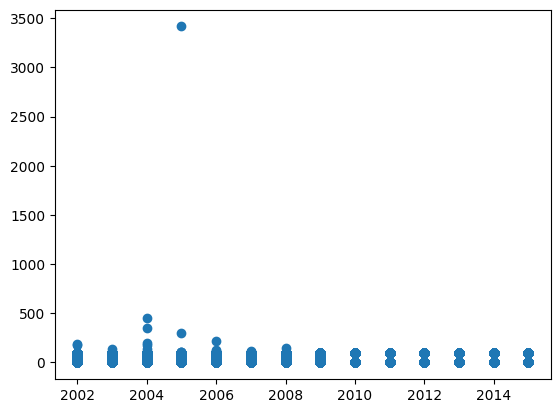

In [764]:
plt.scatter(df['Date Received'].dt.year, df['Amount %'])

plt.show()

# Terlihat outlier di sekitar 3000%

In [765]:
# Melihat outlier pada kolom Amount %
df[df['Amount %'] > 3000]

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition,Days,Amount %
1758,2003-01-22,2002-11-15,PHL,Other,Checkpoint,0.0,Settled,129.95,Settle,-68,inf
1770,2003-01-22,2002-03-11,HNL,Other,Checkpoint,0.0,Settled,283.00,Settle,-317,inf
2193,2003-05-01,2003-03-02,DFW,Property Damage,Checkpoint,0.0,Settled,727.97,Settle,-60,inf
3562,2003-01-27,2003-11-03,SNA,Passenger Property Loss,Checked Baggage,0.0,Settled,150.00,Settle,280,inf
3755,2003-03-17,2003-06-02,BWI,Other,Checked Baggage,0.0,Settled,168.00,Settle,77,inf
...,...,...,...,...,...,...,...,...,...,...,...
39270,2004-05-29,2004-06-07,MCO,Passenger Property Loss,Checked Baggage,0.0,Settled,165.00,Settle,9,inf
44537,2004-04-29,2004-10-09,PHX,Passenger Property Loss,Checked Baggage,0.0,Denied,431.10,Deny,163,inf
57962,2005-01-28,2005-02-24,DEN,Passenger Property Loss,Checked Baggage,0.0,Settled,135.00,Settle,27,inf
64454,2005-05-20,2005-09-04,MSY,Passenger Property Loss,Checked Baggage,6.0,Settled,204.98,Settle,107,3416.33


In [766]:
# Terlihat data yang 

In [767]:
# Drop outlier pada kolom Amount %
df.drop(64454, inplace= True)

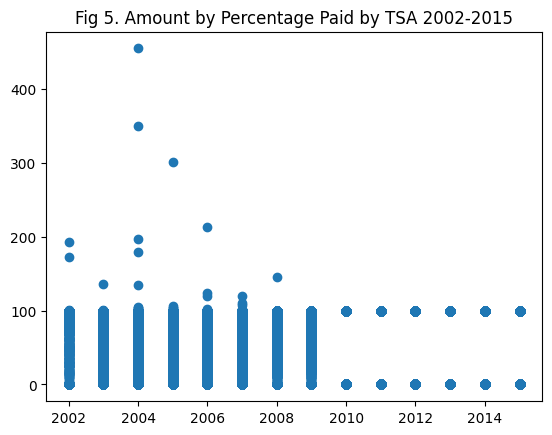

In [768]:
plt.scatter(df['Date Received'].dt.year, df['Amount %'])

plt.title('Fig 5. Amount by Percentage Paid by TSA 2002-2015')
plt.show()

# Terlihat pola pembayaran pada tahun 2002-2009 didominasi pada range 0 - 100%

### 6.2.2 Figure 5 Analysis

Pada Figure 5, terlihat persentase yang dibayarkan oleh TSA kepada penumpang yang mengajukan klaim di dominasi pada rentang 0% - 100%. Terlihat pada data tahun 2010 - 2015 hanya muncul pada titik persentase 0% dan 100%, dimana pada tahap data cleaning diatas, kita tidak dapat mengisi value dimana kolom `Status` = 'Settle'. Beberapa data berada diluar rentang 0% - 100%, di asumsikan apabila pembayaran dilakukan melebihi dari yang diajukan setelah melewati proses penyelidikan maupun pengadilan, dimana penumpang yang mengajukan klaim mendapat ganti rugi yang lebih.

In [769]:
zzz = df

# Bin the 'values' column into intervals
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500)
binned_values = pd.cut(zzz['Amount %'], bins)

# Karena kolom range memiliki tipe data kategori, maka akan dibuah menjadi string terlebih dahulu lalu menghapus '(' dan ']' untuk analisis selanjutnya
binned_values = binned_values.astype(str)

# Get the frequency of each bin
binned_value_counts = binned_values.value_counts().sort_index().to_frame().reset_index()
# binned_value_counts.sort_index().to_frame().reset_index()

In [770]:
binned_value_counts.sort_values(by=['index'], ascending=True)
binned_value_counts['Amount %'] = binned_value_counts['Amount %'].fillna('0.0')

In [771]:
binned_value_counts.sort_values('index')


,index,Amount %
0,"(0, 10]",353
1,"(10, 20]",1077
2,"(100, 500]",31
3,"(20, 30]",1778
4,"(30, 40]",2229
5,"(40, 50]",12064
6,"(50, 60]",2651
7,"(60, 70]",1628
8,"(70, 80]",1530
9,"(80, 90]",1522


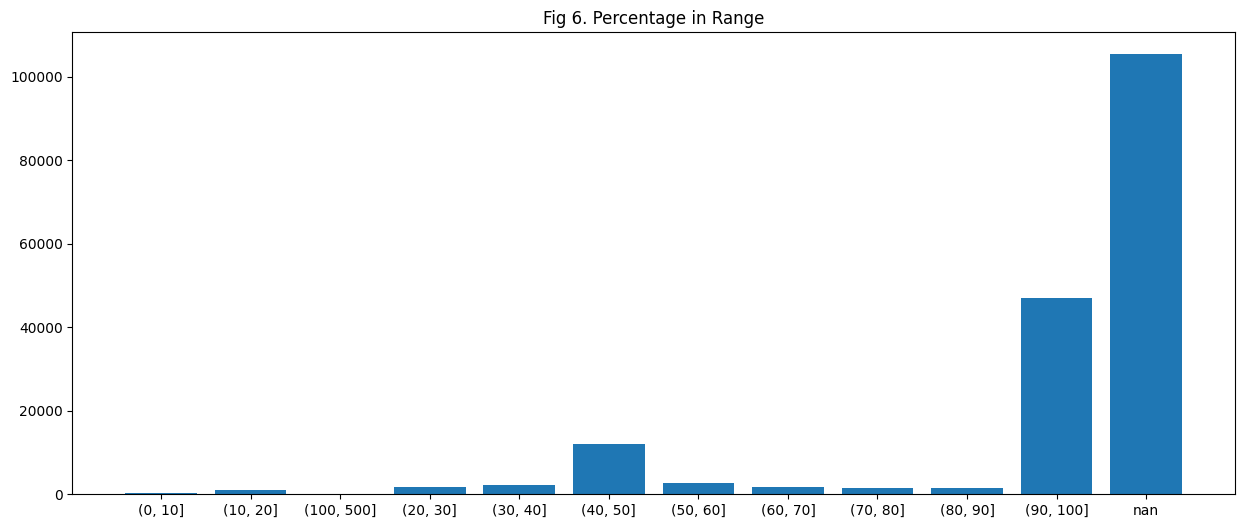

In [772]:
plt.figure(figsize=(15,6))
plt.bar(binned_value_counts['index'], binned_value_counts['Amount %'])

plt.title('Fig 6. Percentage in Range')

plt.show()

### 6.2.3 Figure 6 Analysis

Pada Figure 6, merupakan jumlah klaim dari masing-masing kategori. Terlihat terdapat kategori dengan data NaN, dimana didalamnya merupakan data dengan persentase 0% dan hasil pengihitungan berupa nilai '**inf**'. Dapat kita lihat, klaim di dalam kategori NaN merupakan data terbanyak, dibandingkan dengan kategori-kategori lainnya

# 6.3 Apakah ada insights lain yang dapat kita ambil?

Terlepas dari analisis diatas, ada beberapa hal yang dapat kita ambil berdasarkan data-data lainnya. Berikut adalah beberapa insights yang dapat memberikan insights tambahan:

In [773]:
df['Airport Code'].value_counts()

LAX    8808
JFK    7987
ORD    6348
EWR    6275
MCO    5851
       ... 
VEL       1
DDC       1
SLN       1
PPG       1
SOW       1
Name: Airport Code, Length: 453, dtype: int64

In [774]:
apo_code_freq = df['Airport Code'].value_counts().to_frame().reset_index().rename(columns={'Airport Code': 'Total', 'index': 'Airport Code'})

In [775]:
apo_code_freq.head(10)

,Airport Code,Total
0,LAX,8808
1,JFK,7987
2,ORD,6348
3,EWR,6275
4,MCO,5851
5,MIA,5688
6,ATL,5236
7,SEA,4955
8,LAS,4717
9,PHX,4602


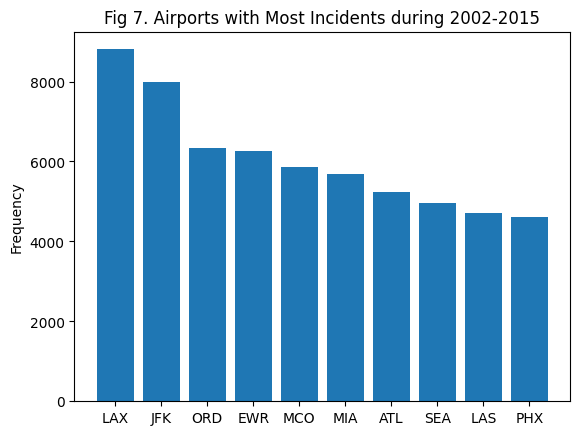

In [776]:
plt.bar(apo_code_freq['Airport Code'].head(10), apo_code_freq.Total.head(10))
plt.title('Fig 7. Airports with Most Incidents during 2002-2015')
plt.ylabel('Frequency')
plt.show()

## 6.3.1 Airports with Most Incident

Berdasarkan data diatas, Bandara dengan kode LAX dan JFK merupakan bandara yang memiliki jumlah insident paling banyak dibandingkan dengan bandara-bandara lainnya secara signifikan. Pada bandara Los Angeles International Airport (LAX) dan John F. Kennedy International Airport (JFK) terdapat 8,808 dan 7,987 insiden, secara berurutan.

In [777]:
most_claim_site = df['Claim Site'].value_counts().to_frame().reset_index().rename(columns={'index': 'Incident Site'})
most_claim_site

,Incident Site,Claim Site
0,Checked Baggage,141329
1,Checkpoint,34322
2,Other,1481
3,Motor Vehicle,217
4,Bus Station,9


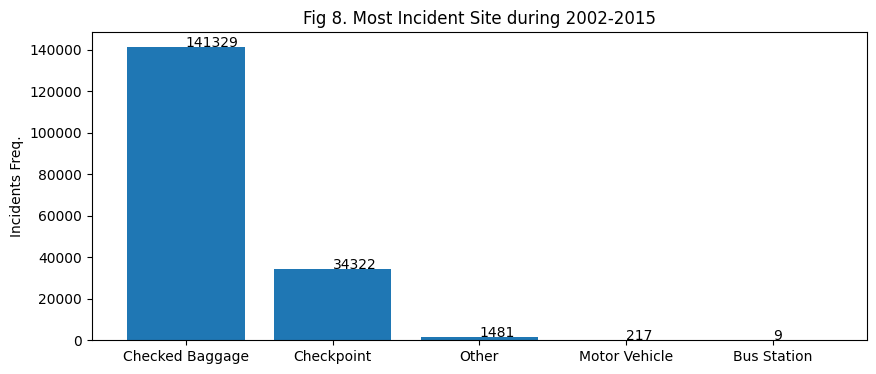

In [778]:
plt.figure(figsize=(10,4))
plt.bar(most_claim_site['Incident Site'], most_claim_site['Claim Site'])

for i, v in enumerate(most_claim_site['Claim Site']):
    plt.text(i, v, str(v), color='black')

plt.title('Fig 8. Most Incident Site during 2002-2015')
plt.ylabel('Incidents Freq.')

plt.show()

## 6.3.2 Locations with Most Incident

Berdasarkan figure diatas, terlihat bahwa bagian cek bagasi merupakan tempat dengan insiden terbanyak, mencapai 141,329 insiden selama tahun 2002-2015. Selanjutnya diikuti dengan checkpoint (34,322 insiden), kategori lain-lain (1,481 insiden), motor vehicle (217 insiden) dan bus station (9 insiden).

In [779]:
lax_freq = df[(df['Incident Date'].dt.year) & (df['Airport Code'] == 'LAX')]
jfk_freq = df[(df['Incident Date'].dt.year) & (df['Airport Code'] == 'JFK')]
# display(lax_freq.head(), jfk_freq.head())
lax_jfk_freq = pd.concat([lax_freq, jfk_freq])

In [780]:
lax_freq = lax_freq['Incident Date'].dt.year.groupby(by=lax_freq['Airport Code']).value_counts().to_frame()
lax_freq = lax_freq.rename({'Incident Date':'Frequency'}, axis=1).reset_index().sort_values(by='Incident Date')
lax_freq

,Airport Code,Incident Date,Frequency
1,LAX,2003,1202
0,LAX,2005,1260
2,LAX,2007,657
3,LAX,2009,453
4,LAX,2011,389
5,LAX,2013,355
6,LAX,2015,337


In [781]:
jfk_freq = jfk_freq['Incident Date'].dt.year.groupby(by=jfk_freq['Airport Code']).value_counts().to_frame()
jfk_freq = jfk_freq.rename({'Incident Date':'Frequency'}, axis=1).reset_index().sort_values(by='Incident Date')
jfk_freq

,Airport Code,Incident Date,Frequency
4,JFK,2003,500
1,JFK,2005,702
0,JFK,2007,808
3,JFK,2009,583
2,JFK,2011,659
5,JFK,2013,401
6,JFK,2015,380


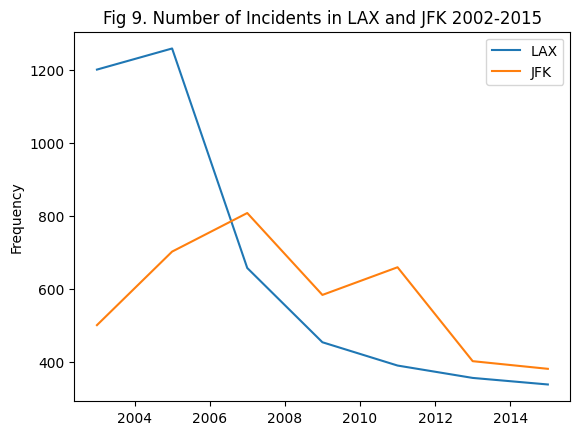

In [782]:
plt.plot(lax_freq['Incident Date'], lax_freq['Frequency'], label='LAX')
plt.plot(jfk_freq['Incident Date'], jfk_freq['Frequency'], label='JFK')

plt.title('Fig 9. Number of Incidents in LAX and JFK 2002-2015')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 6.3.3 Incidents in LAX and JFK during 2002-2015

Berdasarkan figure diatas, terlihat bahwa jumlah insiden pada bandara JFK tiap tahunnya mengalami penurunan jumlah insiden. Dibandingkan dengan bandara LAX, jumlah insiden sempat meningkat dari tahun 2002 hingga 2007, lalu cenderung mengalami penurunan pada tahun-tahun setelahnya.

# 7. Kesimpulan dan Rekomendasi

## 7.1 Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut:

* Dari 204,267 data pada dataset, kita mengambil 177,359 data untuk kita analisis.
* Insiden paling banyak terjadi pada bandara Los Angeles International Airport (LAX).
* Bagian *Checked Baggage* merupakan tempat dimana paling banyak terjadi insiden, diikuti oleh *Checkpoint*.
* Terdapat lonjakan jumlah klaim dan insiden yang signifikan antara tahun 2002 - 2004, lalu seiring tahun keduanya menurun.
* Berdasarkan bulan, terlihat jumlah klaim yang cenderung meningkat tiap bulannya dan diikuti dengan jumlah insiden yang menurun tiap bulan nya.

hal-hal diatas menjawab pertanyaan kita yaitu:
1. Apakah ada tren waktu tertentu dari insiden para pengguna transportasi?
    * **Berdasarkan tahun, terlihat bahwa sejak 2004 yang dimana merupakan puncak jumlah insiden, jumlah klaim dan insiden turun**. Hal ini dapat kita simpulkan bahwa TSA seiring waktu memperbaiki kualitas layanan mereka dan juga diasumsikan adanya faktor teknologi yang lebih baik untuk pengecekan oleh TSA.
    * **Berdasarkan bulan, terlihat bahwa jumlah klaim yang cenderung meningkat tiap bulan nya, diikuti dengan penurunan jumlah insiden tiap bulan nya**. Hal ini cukup membingungkan dikarenakan berbeda seperti jumlah klaim dan insiden tiap tahunnya yang tidak bertolak belakang. Hasil yang bertolak belakang ini bisa disebabkan oleh data yang tidak konsisten, dimana pada beberapa data, terlihat `Date Received` yang menunjukkan kapan pengguna transportasi mengajukan klaim terjadi terlebih dahulu daripada `Incident Date`. Pada proses cleaning, sudah dilakukan untuk mengubah posisi kedua kolom menjadi posisi yang benar, tetapi hasil masih belum konsisten.
    * **Point diatas juga menentukan jarak antara hari terjadinya insiden dengan hari pengajuan klaim, dimana banyak data hari yang terhitung negatif, atau jarak waktu yang mundur**. Tetapi pada figure 'How many days passengers claim their incidents?' terlihat data memiliki pola diantara -500 hingga 500 hari.
    * Dapat disimpulkan bahwa pola-pola yang ditunjukkan telah menunjukkan bagaimana TSA berhasil menekan jumlah insiden yang terjadi, yang dimana menurunkan pula jumlah ganti rugi yang harus dibayarkan oleh TSA.
2. Bagaimana pola ganti rugi TSA atas klaim dari para pengguna transportasi?
    * **Terdapat empat kategori status yang menentukan arah klaim**, yaitu disetujui dan ganti rugi penuh (Approved), disetujui dan ganti rugi sebagian (Settled), klaim ditolak (Denied), dan klaim gagal (Canceled).
    * Berdasarkan kolom `Amount %` yang menunjukkan persentase jumlah yang diajukan dan jumlah yang dibayarkan, terlihat bahwa **data NaN yang dimana representasi dari 0%**, merupakan data yang terbanyak. Hal ini disebabkan karena banyaknya data, terutama pada kolom `Close Amount` yang kosong dan tidak dapat kita isi disaat kolom `Disposition` = Settle.
    * **Tidak terlihat adanya pola pembayaran dari TSA**, dimana dapat terlihat data tersebar secara acak.

## 7.2 Rekomendasi

1. Berdasarkan data, dapat terlihat performa TSA meningkat tiap tahunnya berdasarkan jumlah klaim dan insiden yang menurun seiring tahun. TSA dapat menerapkan program kerja 'Zero-Accident' untuk mengurangi jumlah insiden yang terjadi di wilayah kerja TSA.
2. Memperbaiki sistem pengambilan data, contohnya seperti: Tanggal pengajuan klaim (Date Received) tidak lebih dari 90 hari dari kejadian (Incident Date). Juga untuk menambah kelengkapan bahan analisa, bisa menambahkan seperti tanggal klaim selesai diproses (Date Processed) sehingga bisa menganalisa berapa lama TSA memproses klaim dari pengguna transportasi.
3. Analis selanjutnya dapat menganalisa kolom `Item` dimana berisi barang-barang yang rusak atau hilang. Posisi data kolom `Item` yang sulit untuk dianalisa dapat memberikan insight yang menarik seperti: items yang rentan hilang/rusak, rata-rata kerugian berdasarkan items, dan lain sebagainya.
4. Pada kolom `Amount %`, tidak terdapat adanya pola pembayaran. Diatas, kita memiliki asumsi dimana semua pembayaran ganti rugi yang dilakukan melewati proses penyelidikan dan pengadilan, dimana jumlah ganti rugi ditentukan pada pengadilan. Dengan itu, di rekomendasikan agar TSA dapat menambah pedoman yang menentukan ganti rugi yang harus ditanggung oleh TSA. Contohnya, kerusakan ringan akan ganti rugi senilai 50%-75% dari harga barang.
5. Dengan jumlah insiden tertinggi, dua bandara di USA yaitu Los Angeles Int'l Airport (LAX) dan John F. Kennedy Int'l Airport (JFK) memerlukan perhatian khusus dimana dibutuhkannya lebih banyak personil TSA, terlepas dari turunnya jumlah insiden tiap tahunnya. Hal yang sama juga perlu diterapkan dengan lebih memperhatikan jumlah insiden yang didominasi pada checked baggage, dimana TSA dapat metode pengeecekan yang lebih baik, atau adanya investasi lebih pada teknologi guna mengurangi pengecekan secara langsung.


In [783]:
# Menyimpan DataFrame yang sudah diproses
df.to_excel('tsa_claims_cleaned.xlsx', index_label= False)

In [785]:
df.head()

,Date Received,Incident Date,Airport Code,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition,Days,Amount %
0,2002-12-12,2002-04-01,EWR,Property Damage,Checkpoint,350.00,Approved,350.00,Approve in Full,-255,100.00
1,2004-01-16,2002-02-02,SEA,Property Damage,Checked Baggage,100.00,Settled,50.00,Settle,-713,50.00
2,2003-11-26,2002-04-02,STL,Property Damage,Checked Baggage,278.88,Settled,227.92,Settle,-603,81.73
3,2002-07-02,2003-06-01,MIA,Property Damage,Checkpoint,50.00,Approved,50.00,Approve in Full,334,100.00
4,2002-02-18,2005-05-02,MCO,Property Damage,Checkpoint,84.79,Approved,84.79,Approve in Full,1169,100.00
